In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

import sklearn
import sklearn.datasets as datasets
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('NumPy: {}'.format(np.__version__))

np.random.seed(42)


Python: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
Scikit-learn: 1.4.0
NumPy: 1.26.3


# Short simulation

In [ ]:
# Generate random data
X, Y = datasets.make_blobs(centers=5, cluster_std=0.5, random_state=0)

# Observe the data that you will manipulate
plt.jet() 
plt.scatter(X[:,0], X[:,1])
plt.show()

In [35]:
X

array([[-1.56617881,  8.17367666],
       [-1.33869125,  2.36818187],
       [-1.46344797,  3.11887694],
       [-1.6609057 ,  3.31911046],
       [ 1.19820169,  4.47062449],
       [-1.16491903,  8.15297573],
       [ 1.59141542,  4.90497725],
       [ 0.4519936 ,  3.59377836],
       [ 8.90347371, -1.55966233],
       [ 2.79939362,  1.84560825],
       [ 0.12313498,  5.27917503],
       [ 0.72144399,  4.08475018],
       [-1.19075663,  3.12161318],
       [ 8.72106354, -2.30508708],
       [ 2.64465731,  0.80770124],
       [ 0.78260667,  4.15263595],
       [ 0.5323772 ,  3.31338909],
       [-2.16214651,  3.40258062],
       [-1.58542211,  7.85137529],
       [ 9.2536138 , -2.91521637],
       [-1.42276652,  3.40620178],
       [-0.58532866,  2.24400273],
       [-0.59312453,  3.37090459],
       [ 1.79986495,  0.30734757],
       [-1.72849249,  3.5291048 ],
       [ 9.65915049, -1.91941755],
       [-1.8219901 ,  7.61654999],
       [ 2.04117641,  1.1118296 ],
       [ 0.99914934,

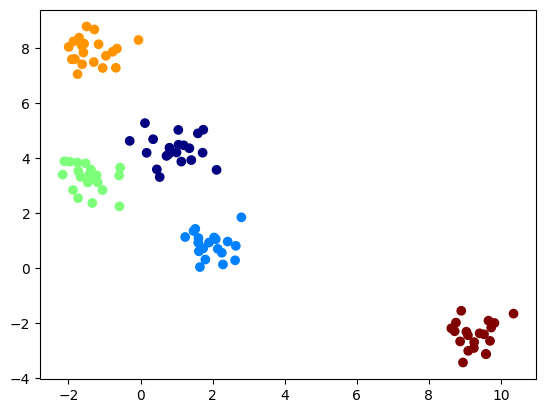

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

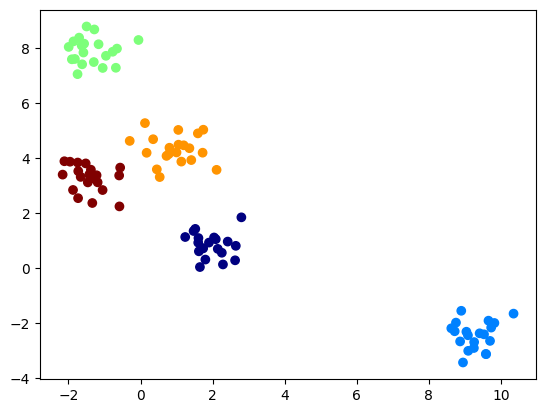

In [5]:
##**** Apply K-means clustering with k=4 then k=5 ***##
from sklearn.cluster import KMeans
kmeans = KMeans(5, random_state=0) 
Y_hat = kmeans.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat)
plt.show()

[[ 1.95870099  0.8332413 ]
 [ 9.29876892 -2.45311503]
 [-1.34316029  7.9094545 ]
 [ 0.94994195  4.32130875]
 [-1.43278801  3.27067413]]


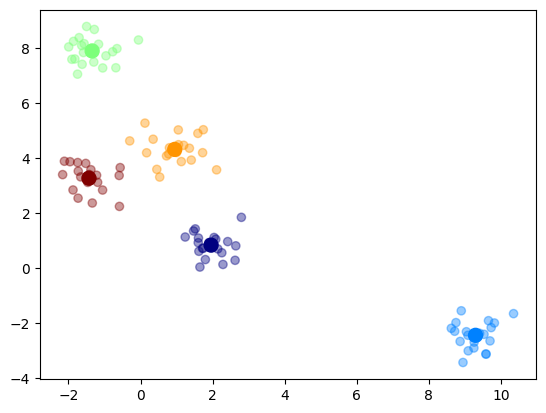

In [6]:
##**** On the figure above, plot the centroids of the resulting clusters ***##
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
print(mu)

# K-means Clustering on MNIST digit data

## 1. Visualise MNIST digit data

In [36]:
# Load 28*28 MNIST Images
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

##**** Take only 10000 instances to shorten runtime of KMeans ***##
X_digits = X_digits[0:10000]       
Y_digits = Y_digits[0:10000]
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))


##**** Print the number of classes, number of features, number of samples ***##
print (n_digits)
print ("n_features: %d" % n_features)
print ("n_samples: %d" % n_samples)


10
n_features: 784
n_samples: 10000


In [38]:
X_digits.value_counts()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  pixel111

In [8]:
##**** Visualize the values of Y-digits
print(Y_digits)
##**** Thus, explain to what refer X_digits and Y_digits ***##

##**** Print the number of samples per class ***##
X_digits=np.array(X_digits)
Y_digits=np.array(Y_digits)
Y_int=Y_digits.astype(int)
print("n_samples per group: %s" % np.bincount(Y_int))

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
n_samples per group: [1001 1127  991 1032  980  863 1014 1070  944  978]


Class: 3


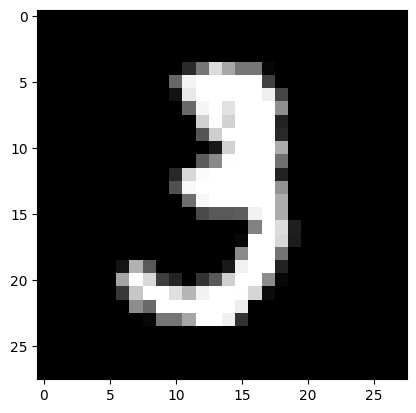

In [9]:
##**** Show an exemple of MNIST data ***##
p=10
plt.imshow(X_digits[p].reshape((28,28)), cmap='gray')
print("Class: %s" % Y_digits[p])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


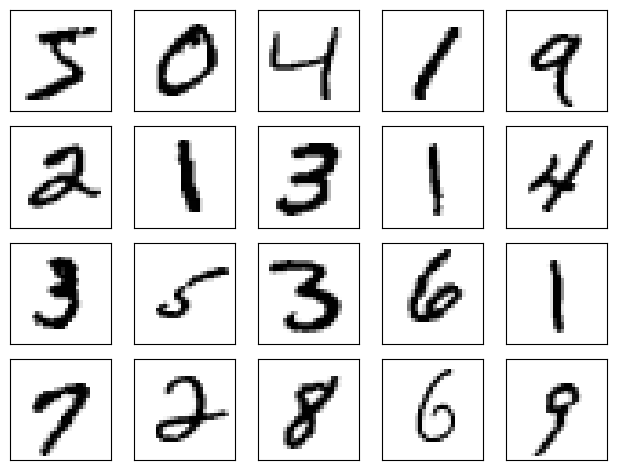

In [10]:
##**** Display twenty images, simultaneously, in grey-scale level and their associated label ***##

plt.rc("image", cmap="binary") 
print(Y_digits[:20])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

## 2. Apply K-Means

******** KMEANS completed ********


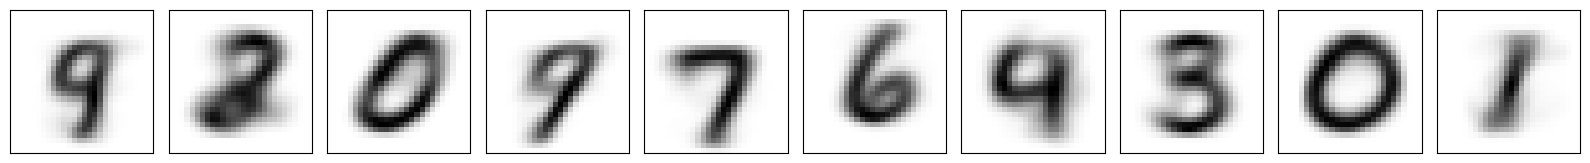

In [11]:
##**** Apply K-means with K=5 ***##
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
model=kmeans.fit(X_digits)

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

##**** Visualize the centroids ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

##**** Analyze finely the obtained centroids ***##

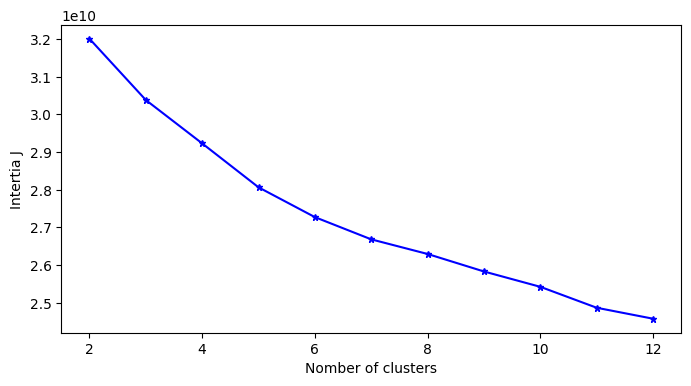

In [12]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 13) ***##
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,13)
    for k in K_range:
        model=KMeans(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) 

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Intertia J')
    plt.show()
    
plot_inertia(X_digits)   

##**** What do you observe ? ***## Pas de coude, on effectue une autre metrique => methode de la silouhete

## 3. Find the best number K of clusters

For k = 2 , Average Silhouette Score : 0.09
For k = 3 , Average Silhouette Score : 0.0585
For k = 4 , Average Silhouette Score : 0.0635
For k = 5 , Average Silhouette Score : 0.0721
For k = 6 , Average Silhouette Score : 0.0694
For k = 7 , Average Silhouette Score : 0.0643
For k = 8 , Average Silhouette Score : 0.0581
For k = 9 , Average Silhouette Score : 0.0753
For k = 10 , Average Silhouette Score : 0.0621
For k = 11 , Average Silhouette Score : 0.063
For k = 12 , Average Silhouette Score : 0.0734


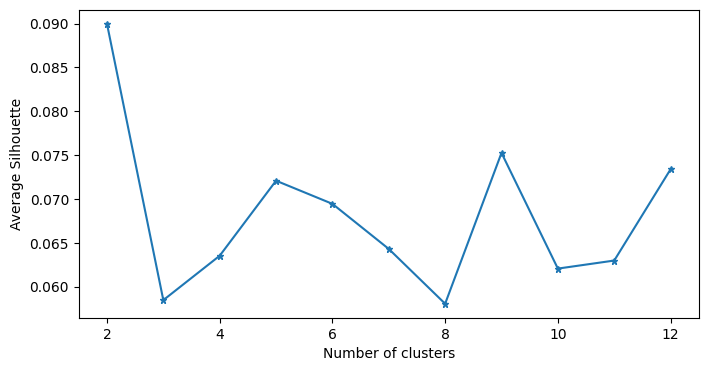

In [13]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X_digits):
    silhouette=[]
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMeans(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.show()

plot_silhouette(X_digits)

##**** Analyze the obtained curve and what do you conclude on the best value of K ***## gde valeur a 2 c'est normal, c'est un choc, prendre 9

## 4. Evaluate the quality of the clustering based on the original labels using different tools

In [14]:
print(clusters)
Y_int

[7 2 6 ... 9 0 3]


array([5, 0, 4, ..., 6, 9, 7])

In [15]:
##**** Tool 1 : Use confusion matrix reporting the distribution of the images of a given class (lines) in each cluster (column) ***##
conf_matrix=sklearn.metrics.confusion_matrix(Y_int,clusters)
print(conf_matrix)

##**** Analyze the results and accordingly conclude on the quality of the clustering  ***##
##**** Perfom a clustering with the best value of K. Analyze the quality of the clustering ***##

[[   4   11  425    1    0   31   12   32  482    3]
 [  14    9    0    1    1    1    0    2    0 1099]
 [   4  648   11    2    8   47   30   51    4  186]
 [  60  143   39   13    8   11    5  686    2   65]
 [ 279    2    0  239    2   15  408    1    0   34]
 [ 164    2  109   51    0   26   21  270   11  209]
 [   2    4   12    0    0  790  107    4   12   83]
 [  90    5    3  359  495    0   60    1    0   57]
 [ 140  326    9   43    0   15   33  242    4  132]
 [ 385    1    2  287   26    2  241   16    4   14]]


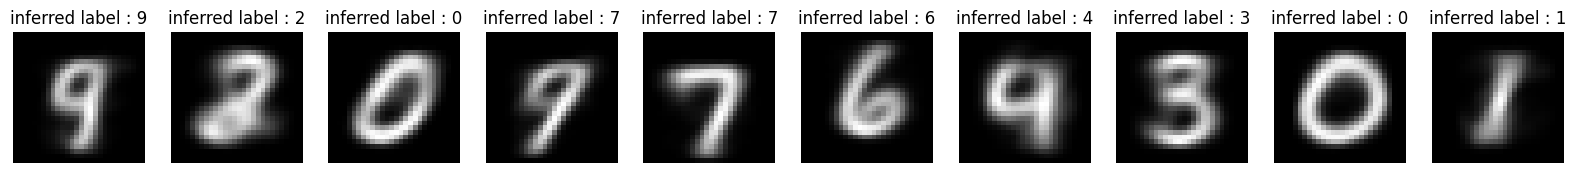

In [16]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))          
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()

##**** Analyze the inferred labels with the best value of K. Conclude ***##

In [17]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3))

Entropies= [7.04053639 7.04838641 6.41345896 6.90374726 6.29156914 6.84374995
 6.82110747 7.17395832 6.25190388 7.54009032]
Average Entropy = 6.833


Cluster  8  presents the lowest entropy value = 6.2519038831658875


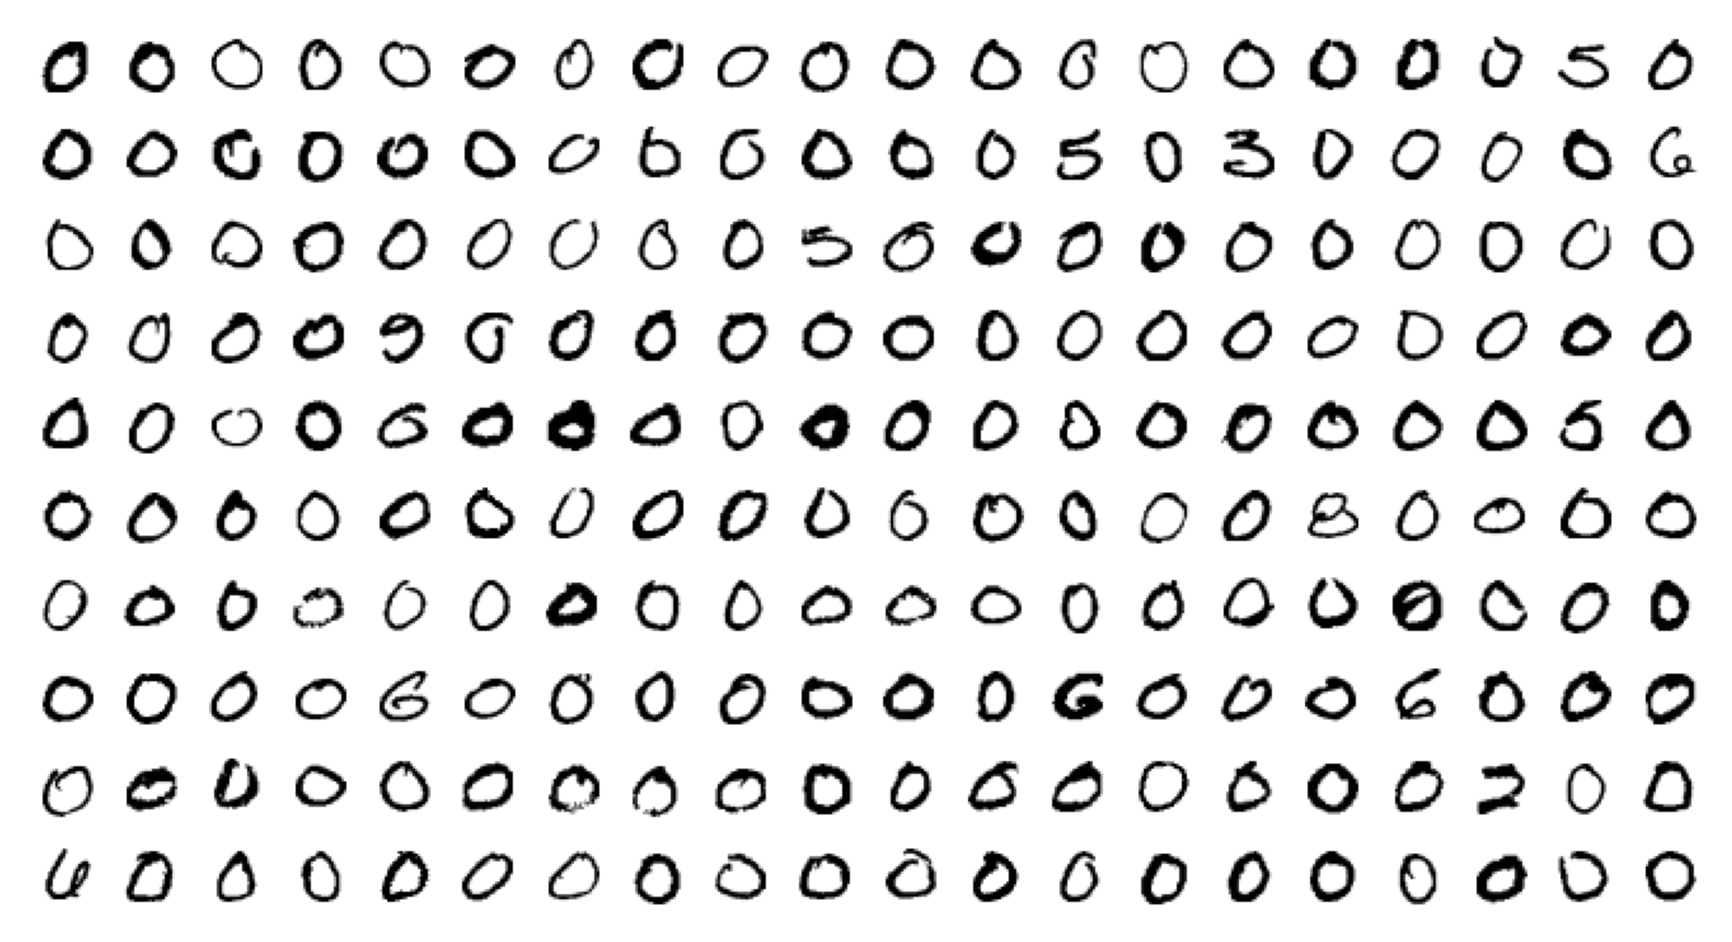

In [18]:
indmin = np.argmin(entropie)

print("Cluster ", indmin," presents the lowest entropy value =",entropie[indmin])
imc = X_digits[clusters==indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

Cluster  9  presents the highest entropy value = 7.540090320145325


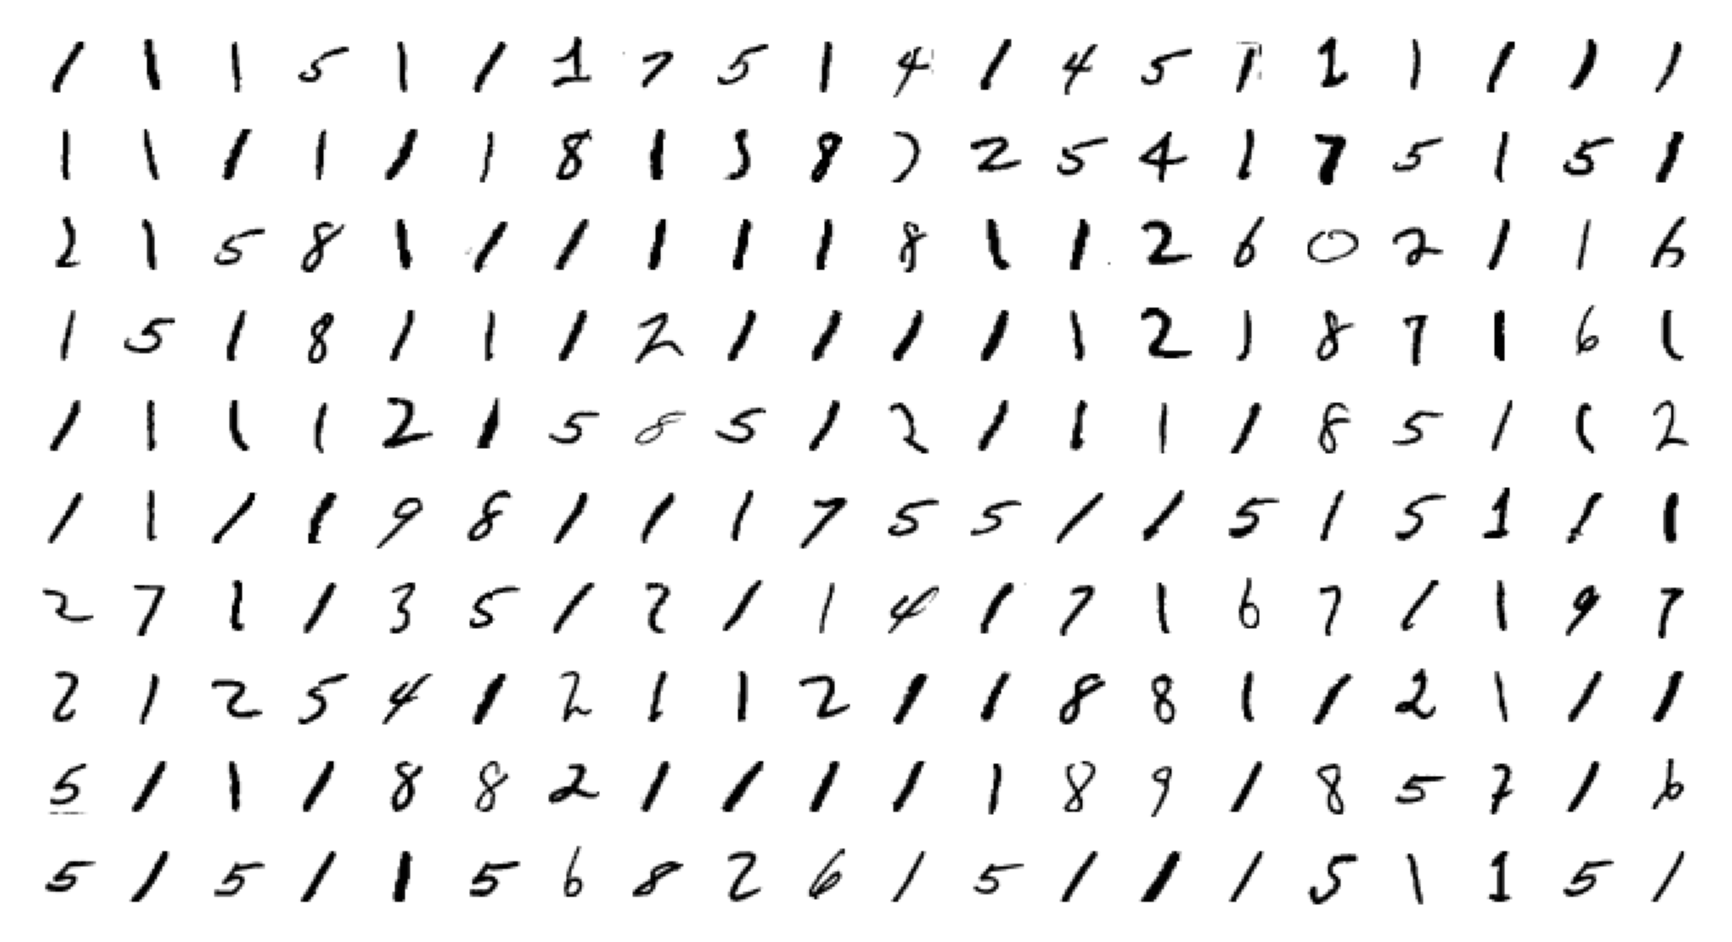

In [19]:
indmax = np.argmax(entropie)

print("Cluster ", indmax," presents the highest entropy value =",entropie[indmax])
imc = X_digits[clusters==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

In [20]:
# Test different number of clusters
clu=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clust in clu:
    estimator = KMeans(n_clusters = n_clust, init="k-means++",n_init=4)
    estimator.fit(X_digits)
     
    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # Compute and display the percentage of total good classification 
    acc=metrics.accuracy_score(Y_int, predicted_Y)
    acc=acc*100
    print("For k =", n_clust, ', Good distribution of : {}%\n'.format(round(acc,2)))

For k = 2 , Good distribution of : 20.93%

For k = 3 , Good distribution of : 30.04%

For k = 4 , Good distribution of : 37.99%

For k = 5 , Good distribution of : 45.54%

For k = 6 , Good distribution of : 47.51%

For k = 7 , Good distribution of : 52.98%

For k = 8 , Good distribution of : 53.09%

For k = 9 , Good distribution of : 56.0%

For k = 10 , Good distribution of : 57.64%

For k = 11 , Good distribution of : 58.51%

For k = 12 , Good distribution of : 61.64%

For k = 13 , Good distribution of : 61.8%

For k = 14 , Good distribution of : 66.29%

For k = 15 , Good distribution of : 68.24%



# K-medoïd Clustering on MNIST Digit

******** KMEDOIDS completed ********


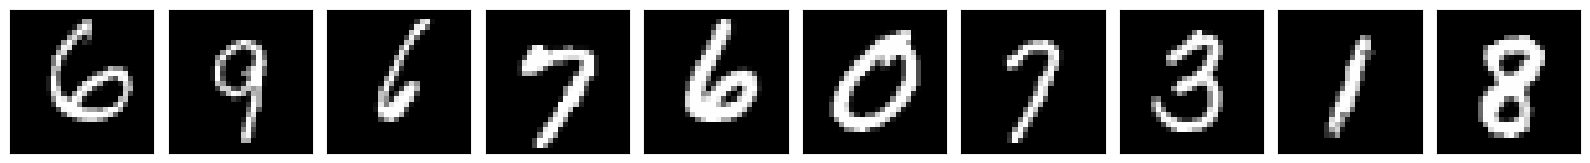

In [21]:
from sklearn_extra.cluster import KMedoids

n_clusters=10
kmedoids = KMedoids(n_clusters=n_clusters, init="k-medoids++")
model=kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

##**** Visualize the centroids ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()


##**** Analyze finely the obtained centroids ***##

# TO COMPLETE for clustering MNIST DIGIT

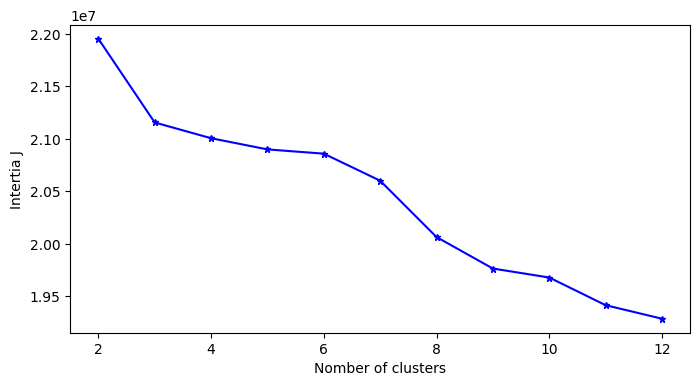

In [22]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 13) ***##
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,13)
    for k in K_range:
        model=KMedoids(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) 

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Intertia J')
    plt.show()
    
plot_inertia(X_digits)   


For k = 2 , Average Silhouette Score : 0.026
For k = 3 , Average Silhouette Score : 0.0318
For k = 4 , Average Silhouette Score : 0.0284
For k = 5 , Average Silhouette Score : 0.0275
For k = 6 , Average Silhouette Score : 0.0192
For k = 7 , Average Silhouette Score : 0.0276
For k = 8 , Average Silhouette Score : 0.0323
For k = 9 , Average Silhouette Score : 0.0256
For k = 10 , Average Silhouette Score : 0.0261
For k = 11 , Average Silhouette Score : 0.0331
For k = 12 , Average Silhouette Score : 0.0298


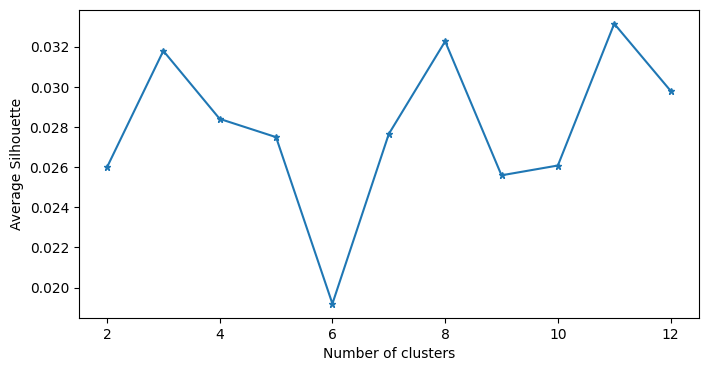

In [23]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X_digits):
    silhouette=[]
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMedoids(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.show()

plot_silhouette(X_digits)


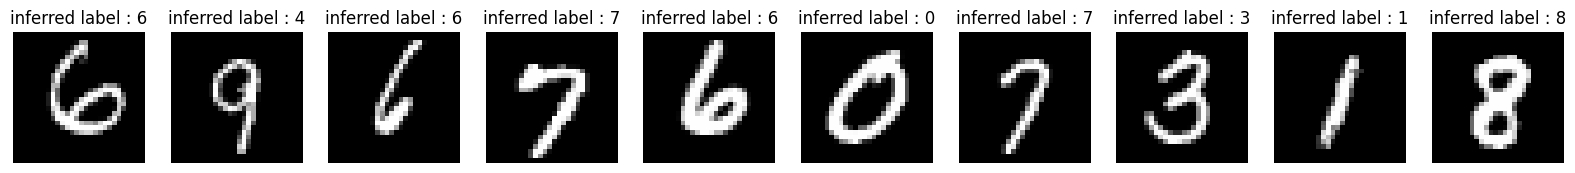

In [24]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))          
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()

##**** Analyze the inferred labels with the best value of K. Conclude ***## images réelles de l'ensemble

In [25]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3)) #6.833 pour kmeans

Entropies= [6.02344759 7.43720637 6.75693239 6.68835471 6.42486902 6.73815249
 6.8916259  7.16472038 7.53689713 6.41673228]
Average Entropy = 6.808


Cluster  0  presents the lowest entropy value = 6.023447592961031


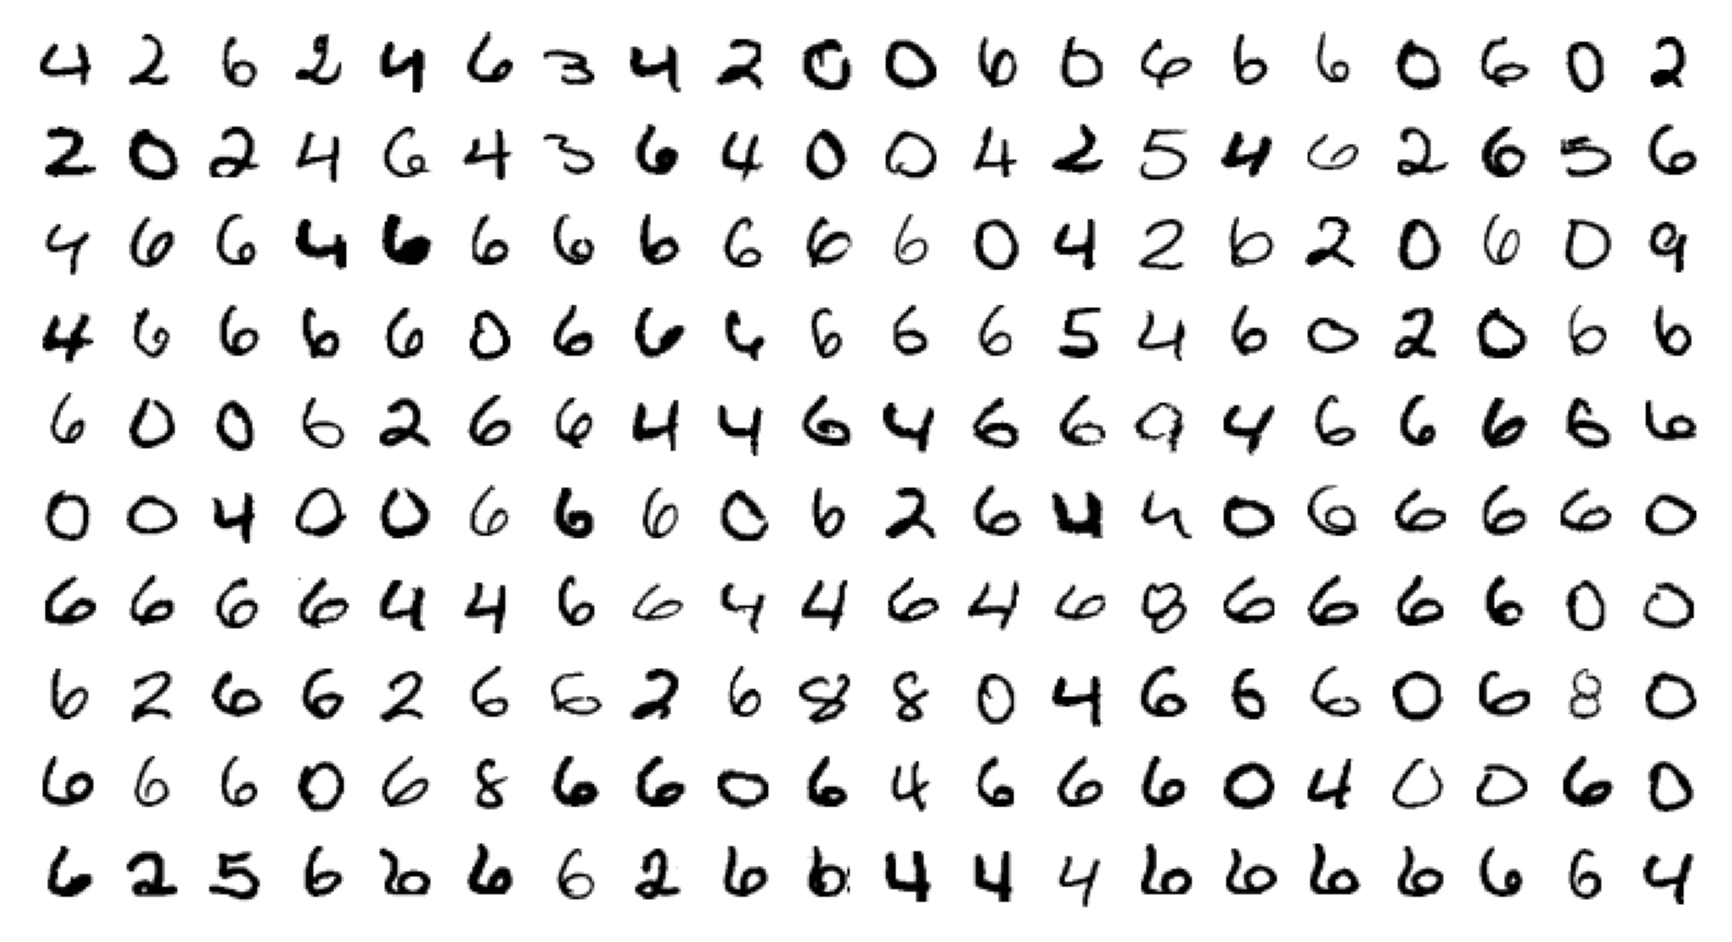

In [26]:
indmin = np.argmin(entropie)

print("Cluster ", indmin," presents the lowest entropy value =",entropie[indmin])
imc = X_digits[clusters==indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

Cluster  8  presents the highest entropy value = 7.536897129566169


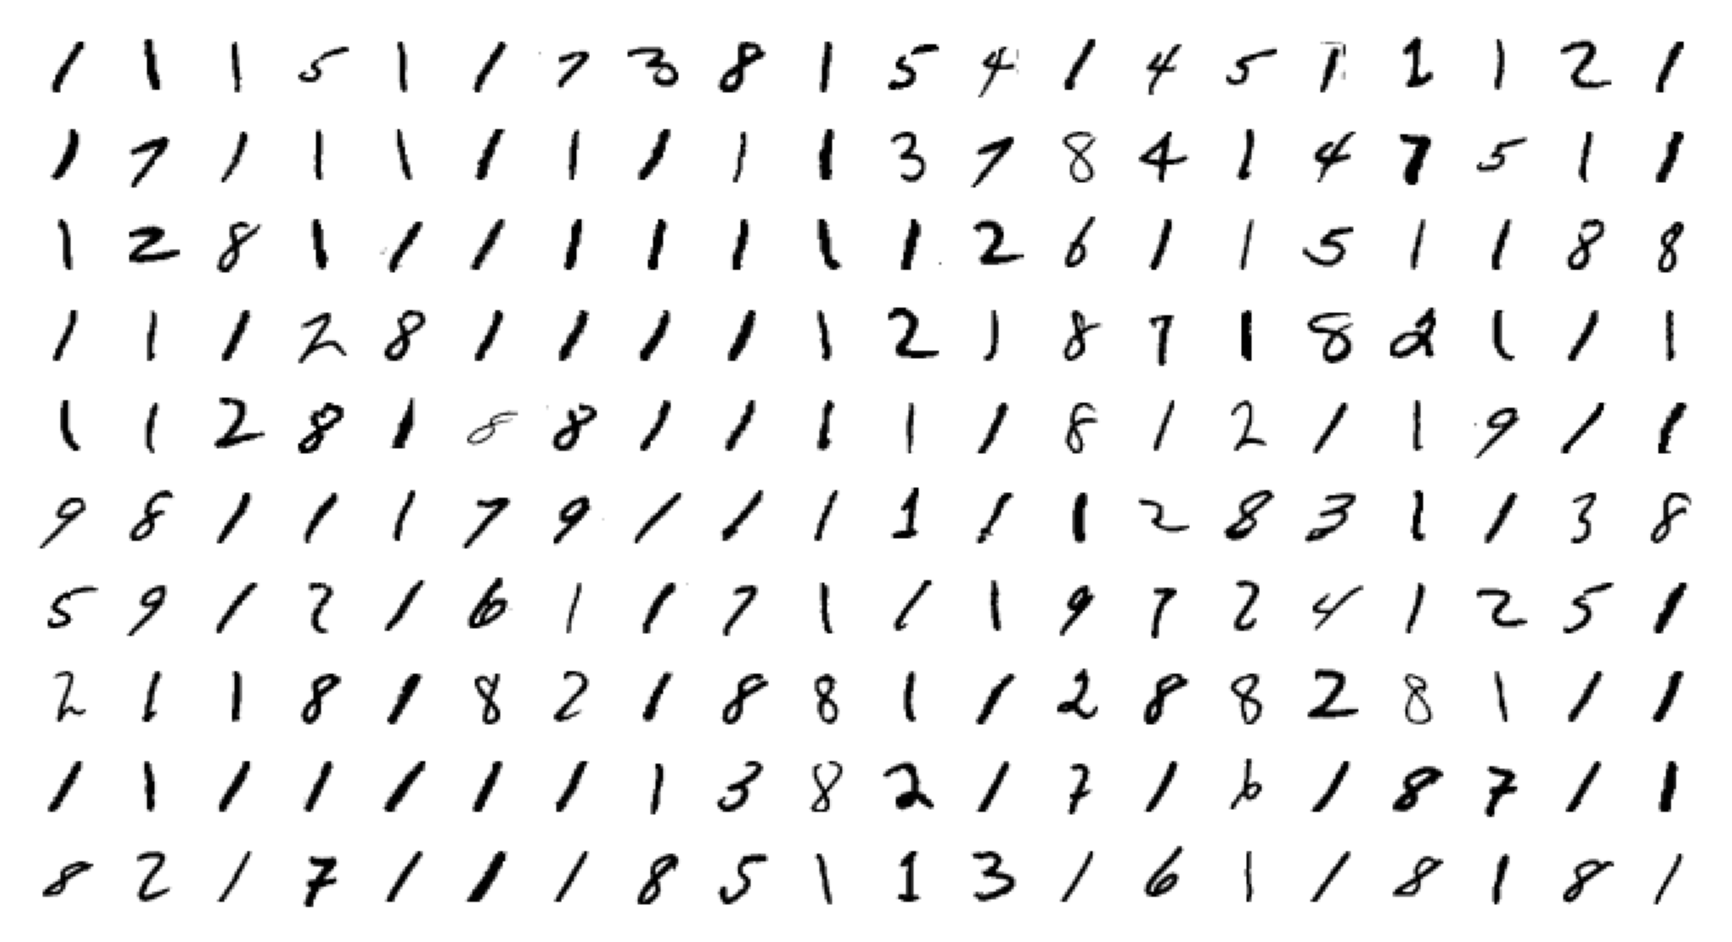

In [27]:
indmax = np.argmax(entropie)

print("Cluster ", indmax," presents the highest entropy value =",entropie[indmax])
imc = X_digits[clusters==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')


In [28]:
# Test different number of clusters
clu=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clust in clu:
    estimator = KMedoids(n_clusters = n_clust, init="k-medoids++")
    estimator.fit(X_digits)
     
    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # Compute and display the percentage of total good classification 
    acc=metrics.accuracy_score(Y_int, predicted_Y)
    acc=acc*100
    print("For k =", n_clust, ', Good distribution of : {}%\n'.format(round(acc,2)))

For k = 2 , Good distribution of : 17.56%

For k = 3 , Good distribution of : 18.79%

For k = 4 , Good distribution of : 31.79%

For k = 5 , Good distribution of : 31.71%

For k = 6 , Good distribution of : 30.94%

For k = 7 , Good distribution of : 46.05%

For k = 8 , Good distribution of : 42.77%

For k = 9 , Good distribution of : 48.33%

For k = 10 , Good distribution of : 46.84%

For k = 11 , Good distribution of : 53.63%

For k = 12 , Good distribution of : 53.79%

For k = 13 , Good distribution of : 53.82%

For k = 14 , Good distribution of : 59.89%

For k = 15 , Good distribution of : 57.18%



In [29]:
#kmedoids, representant est une donnée existante pas une moyenne comme le kmean
# itératiuon plus grande sur toute les données e chaque groupe, on teste si une donnée pour chque donnée du cluster diminue l'entropie
#methode du coude plus facile a appliquer ici, les representant sont des données existantes, 
# l'entropie globale est plus élevée que pour kmean mais les valeur maximale sont plus importante : ~6 pour kmean, ~5 pour kmedoids pour min

In [30]:
# kmeans prend en compte la distributin des données
# pour gmm aussi

# Gaussian Mixture Model for Clustering 


In [31]:
# la fonction de cout du gmm est la log vraissemblance

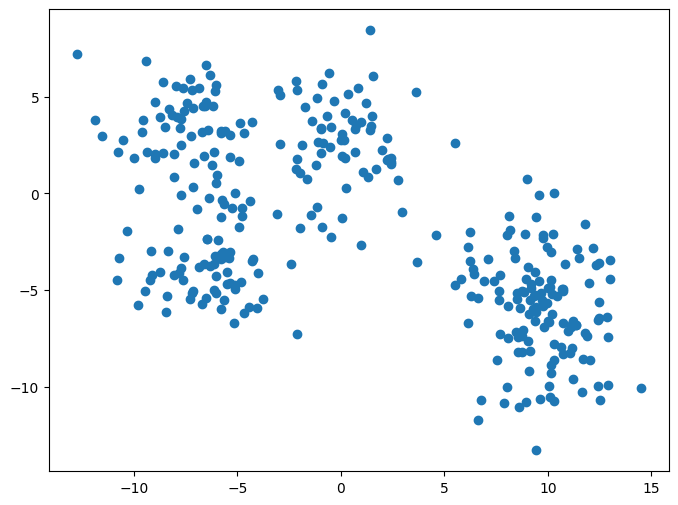

In [32]:
from sklearn.mixture import GaussianMixture
#x, _ = datasets.make_blobs(n_samples=330, centers=5, cluster_std=1.84)
X, Y = datasets.make_blobs(centers=5, cluster_std=0.5, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show() 

In [40]:
X_digits.value_counts()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  pixel111

In [39]:
gm = GaussianMixture(n_components=9).fit(X_digits)
gm.get_params() 
#initialisé avec un kmean k = 5

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 9,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [41]:
centers = gm.means_
print(centers)
  

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(X_digits[:,0], X_digits[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>

In [ ]:
from pandas import DataFrame 
pred = gm.predict(x)

df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show() 

In [ ]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
 gm = GaussianMixture(n_components=i).fit(x)
 pred = gm.predict(x)
 df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
 groups = df.groupby('label')
 f.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()        
plt.show()  

# Limitation of K-Means

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='plasma');


In [ ]:
# To complete by the application of K-means and DBSCAN methods on such data

# K-Means for Compression / Segmentation

In [ ]:
from skimage import io

In [ ]:
##**** Read the image 1 ***##
OrigImage = io.imread('dog.jpg')
io.imshow(OrigImage);
print('Shape of the Image : ', OrigImage.shape)


In [ ]:
##**** Reshape the image : convert the image into a vector BUT here each element of the vector is in 3D (RGB) ***##
rows, cols = OrigImage.shape[0], OrigImage.shape[1]
image = OrigImage.reshape(rows * cols, 3)
print(image.shape)
print(image[:4])

In [ ]:
##**** Apply K-Means on the image with K=5, K=10 and K=16 ***##
kMeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
model=kMeans.fit(image)

##**** Observe examples of Centeroids in RGB domain (3D) ***##
centers = np.asarray(model.cluster_centers_, dtype = np.uint8)
#centers

In [ ]:
# labels 
labels = np.asarray(model.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
#labels

In [ ]:
##**** Reconstruction of the image based on the segmentation obtained with K-means ***##
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # Assignment of every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
#io.imsave('dog-compressed.png', newImage);
io.imshow(newImage);
newImage.shape

In [ ]:
##**** Display the original and the compressed images side-by-side for a better comparion ***##
##**** Compare with different values of k clusters ***##

fig, ax = plt.subplots(1, 2, figsize=(20, 10),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(OrigImage)
ax[0].set_title('Original Image', size=10)
ax[1].imshow(newImage)
ax[1].set_title('Compressed Image', size=10);